## Neural Network Multiple Multiclass

In [272]:
%run DataSplitting.ipynb
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.callbacks import EarlyStopping
# %matplotlib widget
import matplotlib.pyplot as plt

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
# from public_tests import *
# from autils import *
# from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)



Training set: (2923, 11) (2923,)
Testing set: (627, 11) (627,)
Validation set: (627, 11) (627,)

Training set:
      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
2830   0.525     0.430   0.135        0.8435          0.4325          0.1800   
925    0.430     0.325   0.100        0.3645          0.1575          0.0825   
3845   0.455     0.350   0.105        0.4160          0.1625          0.0970   
547    0.205     0.155   0.045        0.0425          0.0170          0.0055   
2259   0.590     0.465   0.160        1.1005          0.5060          0.2525   

      Shell weight   Age  Sex_F  Sex_I  Sex_M  
2830        0.1815  10.5    1.0    0.0    0.0  
925         0.1050   8.5    0.0    1.0    0.0  
3845        0.1450  12.5    0.0    0.0    1.0  
547         0.0155   8.5    0.0    0.0    1.0  
2259        0.2950  14.5    1.0    0.0    0.0  

Testing set:
      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
3142   0.215     0.165   0

## Softmax Definition

In [273]:
def my_softmax(z):
    ### START CODE HERE ###
    ez = np.exp(z)
    a = ez/np.sum(ez)
    ### END CODE HERE ###
    return a

## Model Declaration

In [274]:
tf.random.set_random_seed(1234) # for consistent results
model = Sequential(
    [
        ### START CODE HERE ###
        tf.keras.layers.InputLayer((X_train.shape[1],)),
        tf.keras.layers.Dense(3, activation="relu", name="L1"),
        tf.keras.layers.Dense(3, activation="linear", name="L2")
        ### END CODE HERE ###
    ], name = "my_model"
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)


In [275]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 3)                 36        
_________________________________________________________________
L2 (Dense)                   (None, 3)                 12        
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


# Examine Layer Weights

In [276]:
[layer1, layer2] = model.layers
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")

W1 shape = (11, 3), b1 shape = (3,)
W2 shape = (3, 3), b2 shape = (3,)


## Define Loss function

In [277]:

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

#y_train = [Age<8, Age>=8 && Age<15, Age>15]
#y_train_classification=['young','middle-age','old']
#y_train_encoded = [2,0,1]
history = model.fit(
    X_train_scaled, y_train_encoded,
    validation_data=(X_val_scaled, y_val_encoded),
    epochs=100,
    batch_size=32
)

Train on 2923 samples, validate on 627 samples
Epoch 1/100


2923/2923 [==============================] - 1s 450us/sample - loss: 1.0400 - val_loss: 0.9449
Epoch 2/100
2923/2923 [==============================] - 0s 22us/sample - loss: 0.8462 - val_loss: 0.7790
Epoch 3/100
2923/2923 [==============================] - 0s 21us/sample - loss: 0.7203 - val_loss: 0.6932
Epoch 4/100
2923/2923 [==============================] - 0s 25us/sample - loss: 0.6581 - val_loss: 0.6452
Epoch 5/100
2923/2923 [==============================] - 0s 25us/sample - loss: 0.6189 - val_loss: 0.6103
Epoch 6/100
2923/2923 [==============================] - 0s 28us/sample - loss: 0.5879 - val_loss: 0.5805
Epoch 7/100
2923/2923 [==============================] - 0s 34us/sample - loss: 0.5594 - val_loss: 0.5525
Epoch 8/100
2923/2923 [==============================] - 0s 24us/sample - loss: 0.5314 - val_loss: 0.5255
Epoch 9/100
2923/2923 [==============================] - 0s 23us/sample - loss: 0.5040 - val_loss: 0.4991
Epoch 10/100
2923/2923 [==============================] -

# Loss Plot

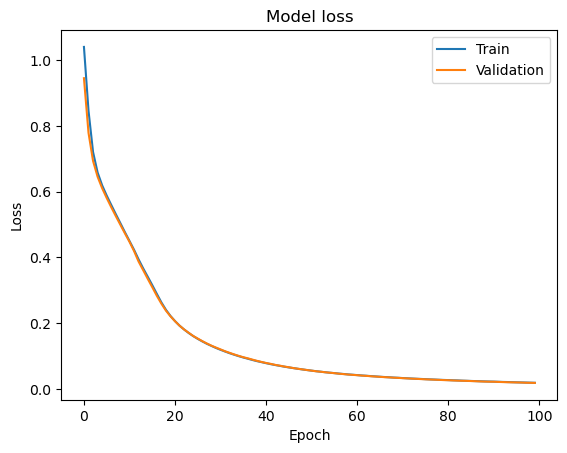

In [278]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [279]:
## Tuning and Evaluation

In [280]:
# def build_model(num_neurons):
#     model_2 = Sequential([
#         tf.keras.layers.InputLayer((11,)),
#         tf.keras.layers.Dense(num_neurons, activation="relu", name="L1"),
#         tf.keras.layers.Dense(3, activation="linear", name="L2")
#     ], name="my_model_2")

#     model_2.compile(
#         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#         optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#     )

#     return model_2
# neuron_configs = [5, 10, 20, 50]
# validation_losses = []

# for num_neurons in neuron_configs:
#     model_2 = build_model(num_neurons)
#     #using early stopping to automatically stop training when the validation loss stops improving. This can prevent overfitting. 
#     early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#     history = model_2.fit(X_train_scaled, y_train_encoded, validation_data=(X_val_scaled, y_val_encoded), epochs=100, batch_size=32, callbacks=[early_stopping])
#     # Evaluate and print performance metrics
#     eval_metrics = model_2.evaluate(X_val_scaled, y_val_encoded)
#     validation_loss = eval_metrics
#     validation_losses.append((num_neurons, validation_loss))

# # Sort and print validation losses
# sorted_losses = sorted(validation_losses, key=lambda x: x[1])
# for neurons, loss in sorted_losses:
#     print(f"Neurons: {neurons}, Validation Loss: {loss}")

## Prediction

In [281]:

#y_train = [Age<8, Age>=8 && Age<15, Age>15]
#y_train_classification=['young','middle-age','old']
#y_train_encoded = [2,0,1]

age_of_index = X_test_scaled[300]
prediction = model.predict(age_of_index.reshape(1,11))  # prediction
print(f" Largest Prediction index: {np.argmax(prediction)}")

 Largest Prediction index: 2


## Probability of output with SoftMax

In [282]:
prediction_p = tf.nn.softmax(prediction)

with tf.compat.v1.Session() as sess:
    prediction_p_np = prediction_p.eval()

print(f"Probability vector:\n{prediction_p_np}")
print(f"Total of predictions: {np.sum(prediction_p_np):0.3f}")


predicted_class = np.argmax(prediction_p_np)
print(f"Predicted Class Index: {predicted_class}")


Probability vector:
[[4.38e-09 1.34e-10 1.00e+00]]
Total of predictions: 1.000
Predicted Class Index: 2


## Unmatched Prediction and Real Value

In [283]:
y_pred = model.predict(X_test_scaled)  
# Get the predicted class labels
predicted_classes = np.argmax(y_pred, axis=1)
# Find indices where predictions don't match true labels
incorrect_indices = np.where(predicted_classes != y_test_encoded)[0]
# Store incorrect predictions for later printing
incorrect_predictions = []
# Print out the ages and corresponding predictions for the incorrect instances
for index in incorrect_indices:
    age = y_test_encoded[index]
    prediction = predicted_classes[index]
    incorrect_predictions.append((index, age, prediction))
    print(f"Index: {index}, True Age: {age}, Predicted Age: {prediction}")
# Calculate accuracy
accuracy = np.sum(predicted_classes == y_test_encoded) / len(y_test_encoded)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print detailed information about incorrect predictions
# print("\nIncorrect Predictions:")
# for index, true_age, predicted_age in incorrect_predictions:
#     print(f"Index: {index}, True Age: {true_age}, Predicted Age: {predicted_age}")


Accuracy: 100.00%
